In [1]:
import zipfile
import pandas as pd
from pandas import DataFrame, Series
from io import TextIOWrapper
from zipfile import ZipFile, ZIP_STORED, ZIP_DEFLATED
import csv
import re
import os
import matplotlib
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
import datetime
import calendar
import numpy as np
import pgeocode
import ssl
import geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
from IPython.core.display import HTML
from IPython.core.display import display
from matplotlib.animation import FuncAnimation
import ffmpeg
import matplotlib.animation as animation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
%matplotlib inline

In [3]:
matplotlib.rcParams["font.size"]=18
pd.set_option("display.max_columns", None)
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

In [4]:
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
def read_csv(name):
    with open(name, 'rb') as WI:
        reader = csv.reader(TextIOWrapper(WI))
        for row in reader:
            yield row
            
def make_df(name):
    reader = read_csv(name)
    header = next(reader)
    df = DataFrame(reader)
    df.columns = header
    return df

In [6]:
df_2015 = make_df('General_Payment_Data___Detailed_Dataset_2015_Reporting_Year-2015.csv')
df_2016 = make_df('General_Payment_Data___Detailed_Dataset_2016_Reporting_Year-2016.csv')
df_2017 = make_df('General_Payment_Data___Detailed_Dataset_2017_Reporting_Year-2017.csv')
df_2018 = make_df('General_Payment_Data___Detailed_Dataset_2018_Reporting_Year-2018.csv')

In [7]:
df = df_2015.append(df_2016, ignore_index=True, sort=True).append(df_2017, ignore_index=True, sort=True).append(df_2018, ignore_index=True, sort=True)

In [8]:
df['Date_of_Payment']= pd.to_datetime(df['Date_of_Payment'])
df['Total_Amount_of_Payment_USDollars']=df['Total_Amount_of_Payment_USDollars'].str.replace(',',"").astype(float)

In [9]:
df = df.replace(np.nan, '', regex=True)

In [10]:
df['day'] = df['Date_of_Payment'].dt.day
df['month'] = df['Date_of_Payment'].dt.month
df['year'] = df['Date_of_Payment'].dt.year

# DRUG AND MEDICAL COMPANIES PAY A LOT OF MONEY TO PHYSICIANS AND TEACHING

### 1. How much money in total typically gets paid out on a given day over time in January?

In [11]:
df_january_2015 = df[(df['year']==2015) & (df['month']==1)]
df_january_2016 = df[(df['year']==2016) & (df['month']==1)]
df_january_2017 = df[(df['year']==2017) & (df['month']==1)]
df_january_2018 = df[(df['year']==2018) & (df['month']==1)]

In [12]:
df_jan_15 = df_january_2015.groupby('day').sum()['Total_Amount_of_Payment_USDollars']
df_jan_16 = df_january_2016.groupby('day').sum()['Total_Amount_of_Payment_USDollars']
df_jan_17 = df_january_2017.groupby('day').sum()['Total_Amount_of_Payment_USDollars']
df_jan_18 = df_january_2018.groupby('day').sum()['Total_Amount_of_Payment_USDollars']

In [13]:
df_january = DataFrame({
    '2015': df_jan_15,
    '2016': df_jan_16,
    '2017': df_jan_17,
    '2018': df_jan_18 })

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

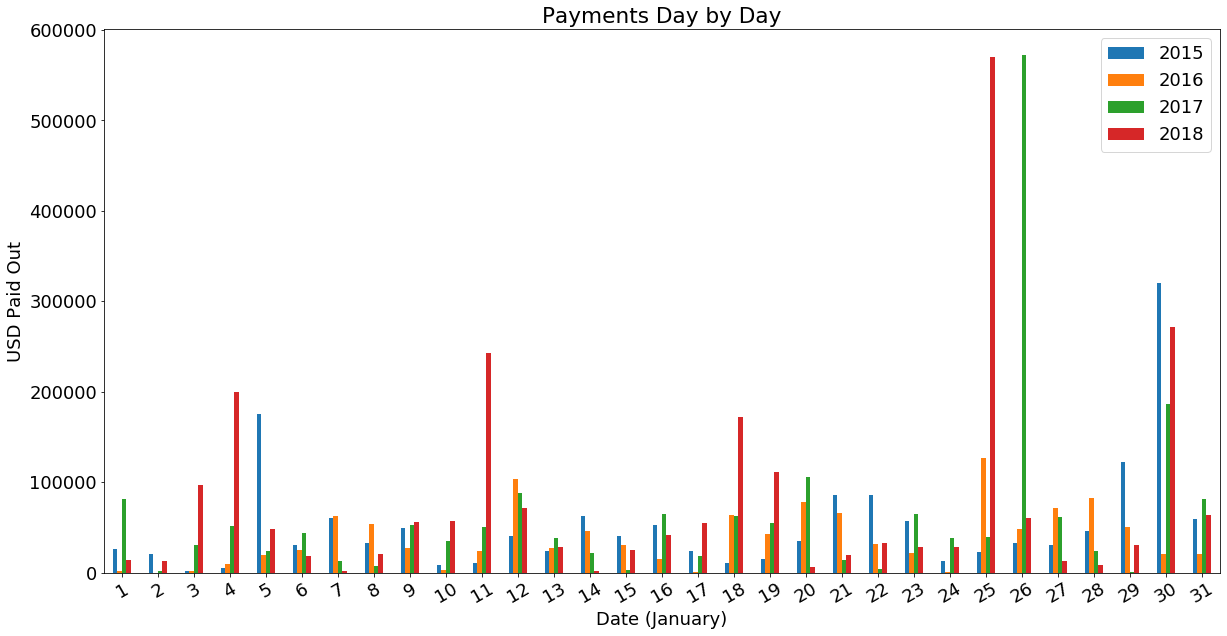

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
# ax.bar(x=df_1['Date_of_Payment'],height=df_1['Total_Amount_of_Payment_USDollars'])
df_january.plot.bar(ax=ax, title = 'Payments Day by Day')
ax.set_ylabel('USD Paid Out')
ax.set_xlabel('Date (January)')
plt.xticks(rotation=30)

## Do other months have outrageous payouts like that?


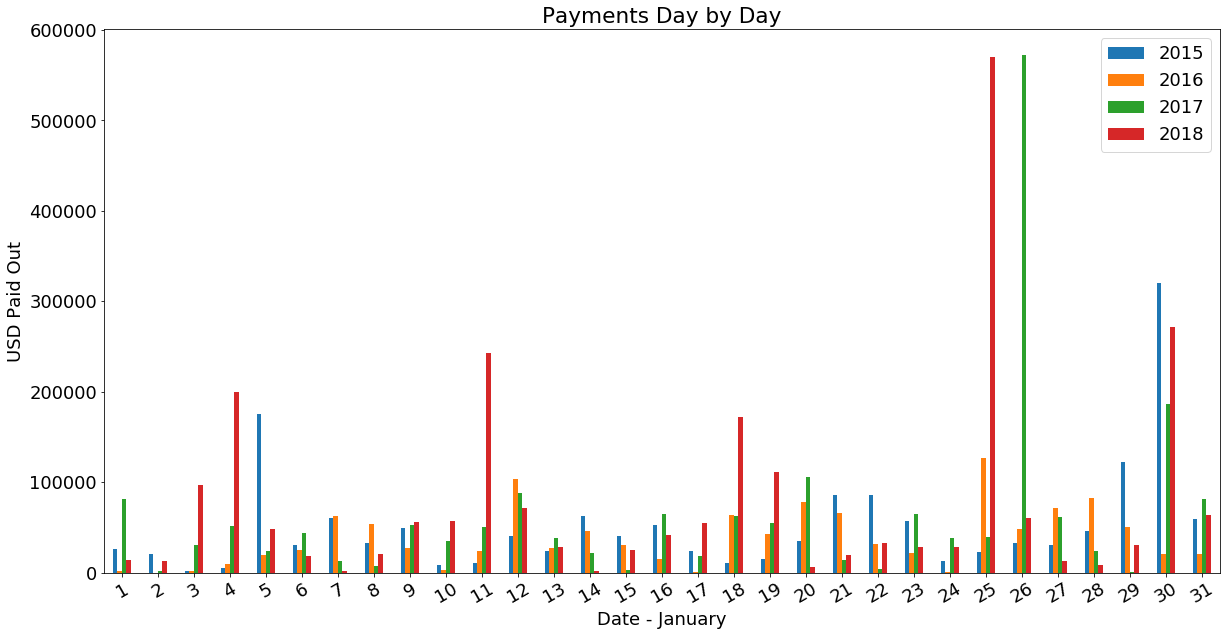

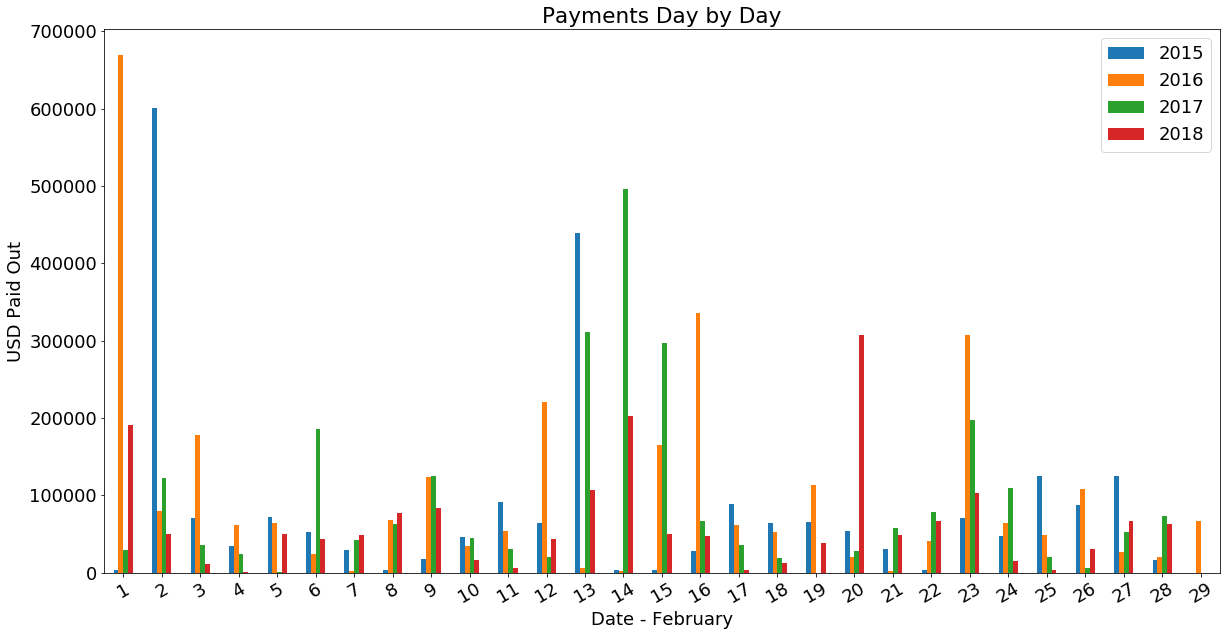

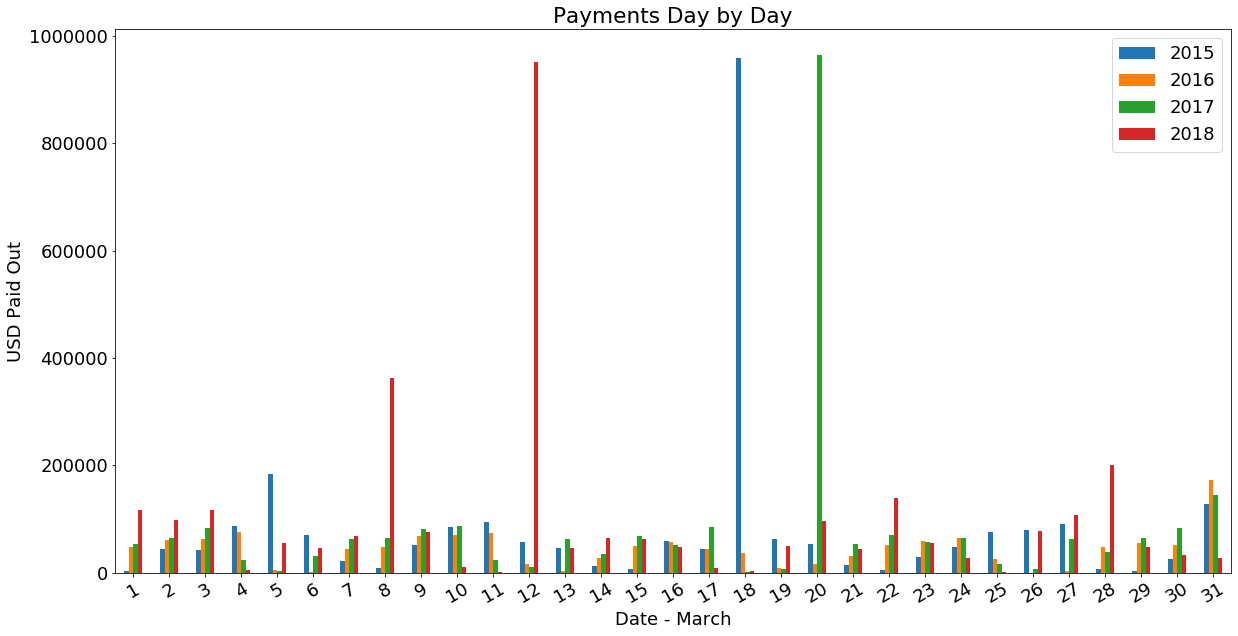

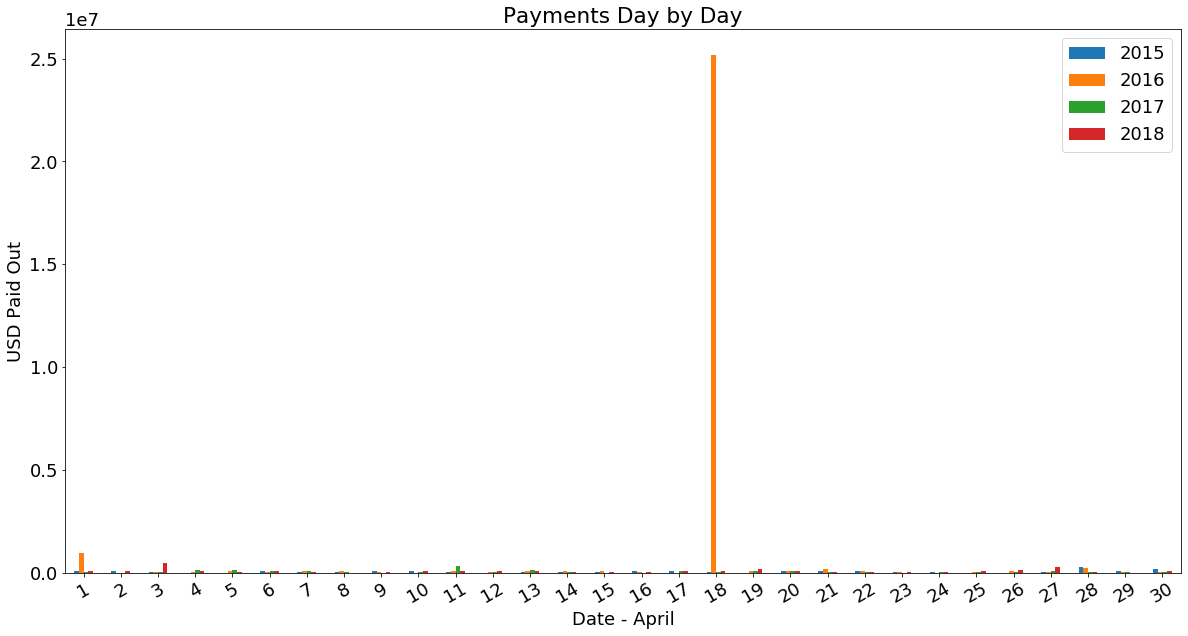

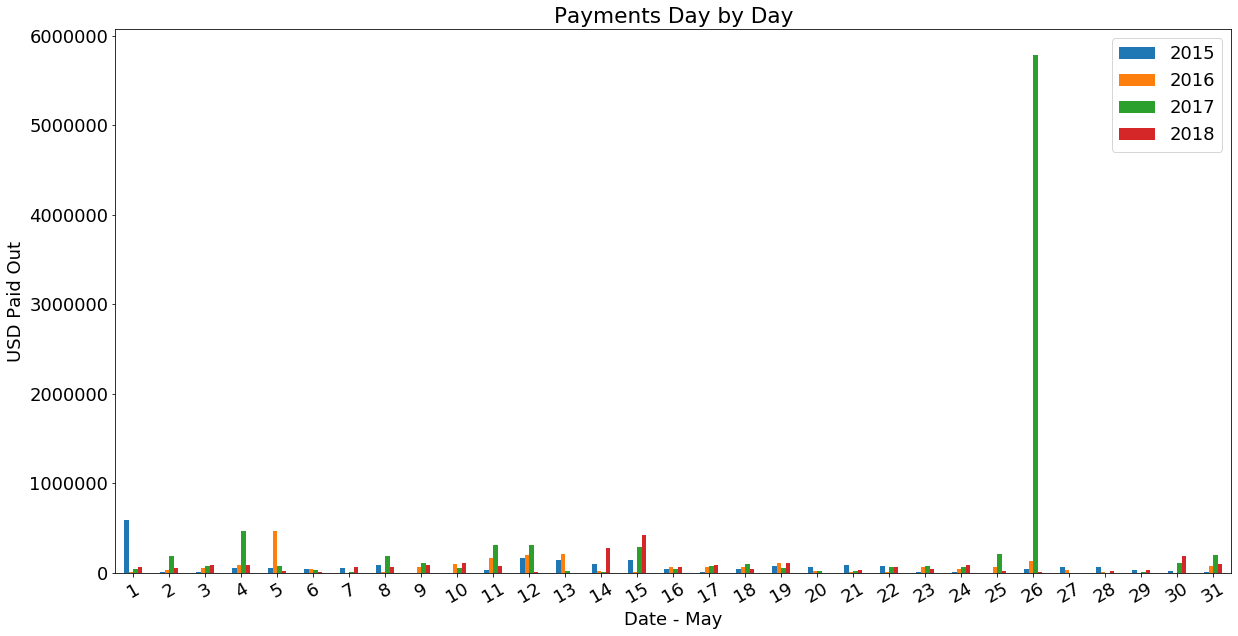

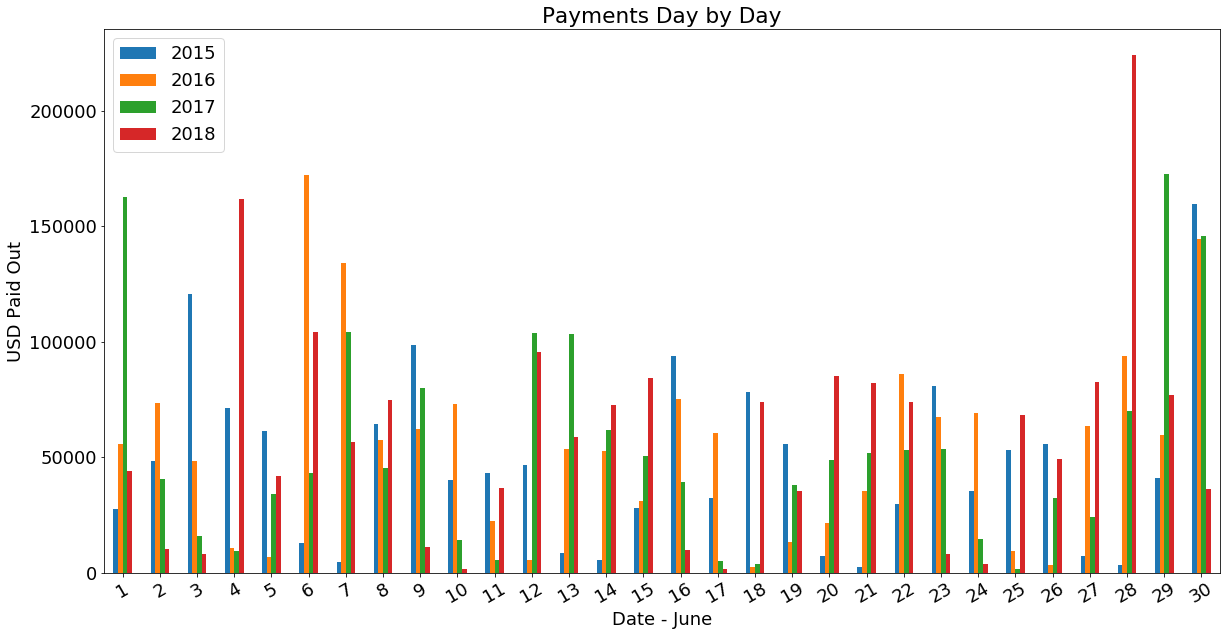

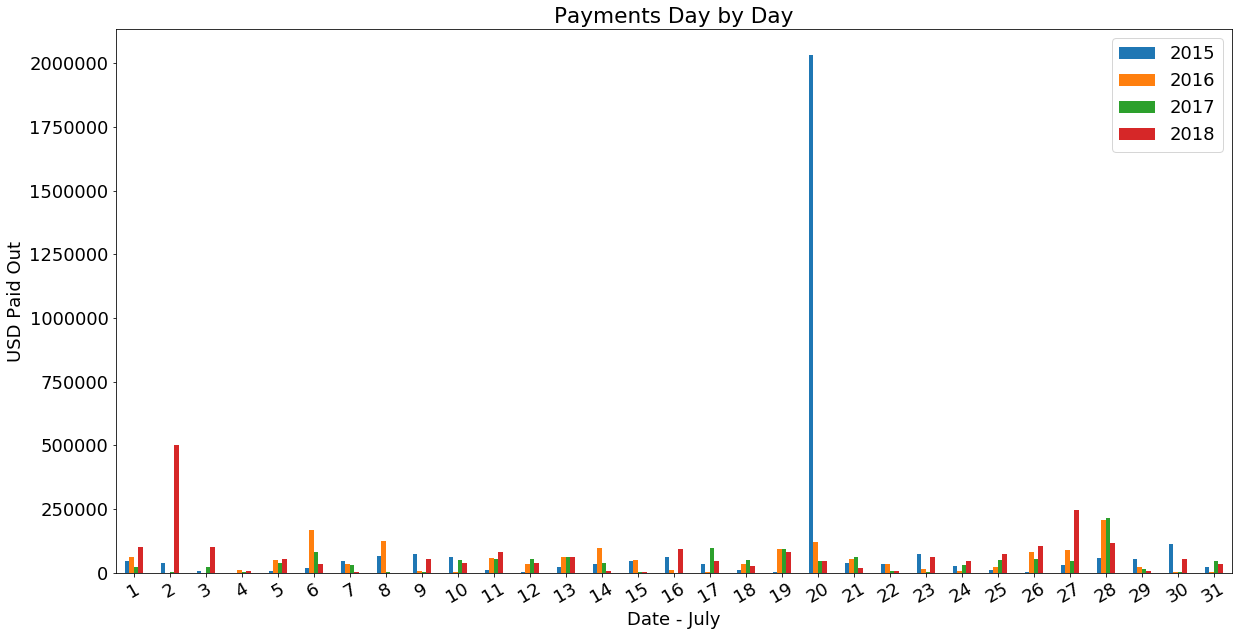

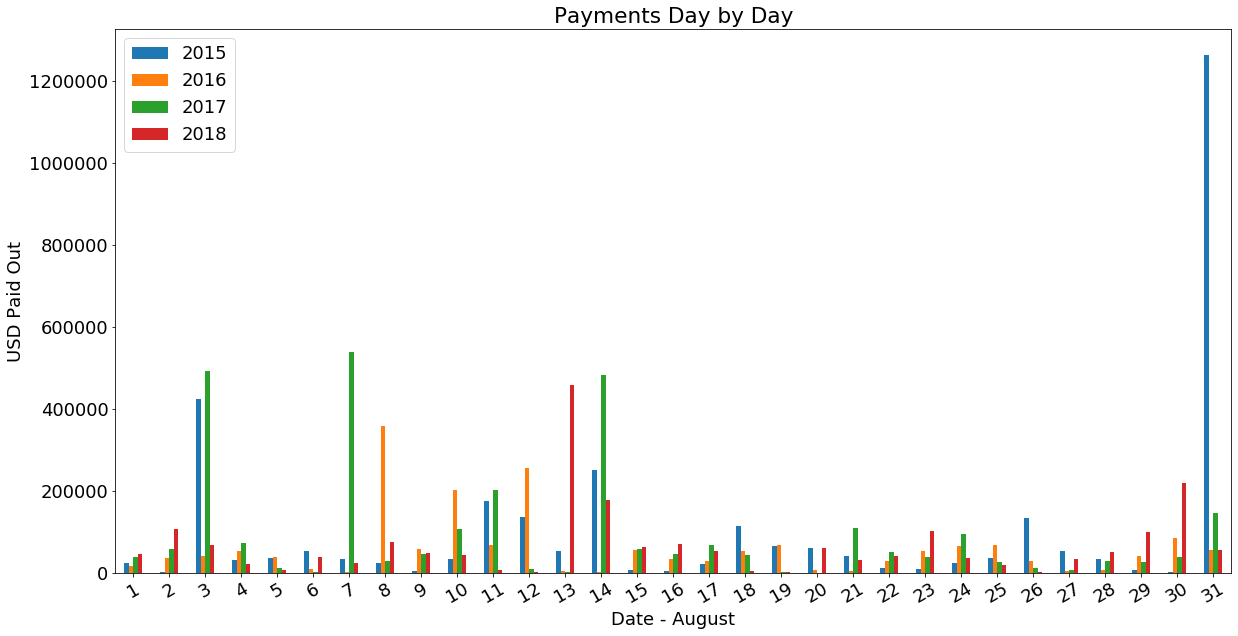

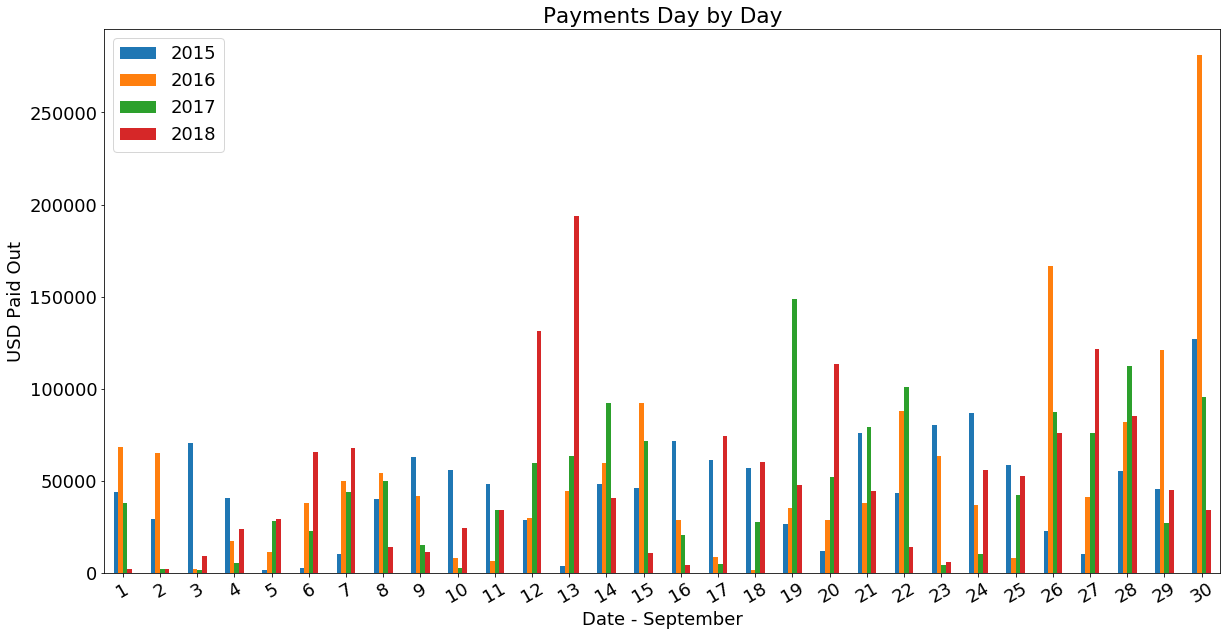

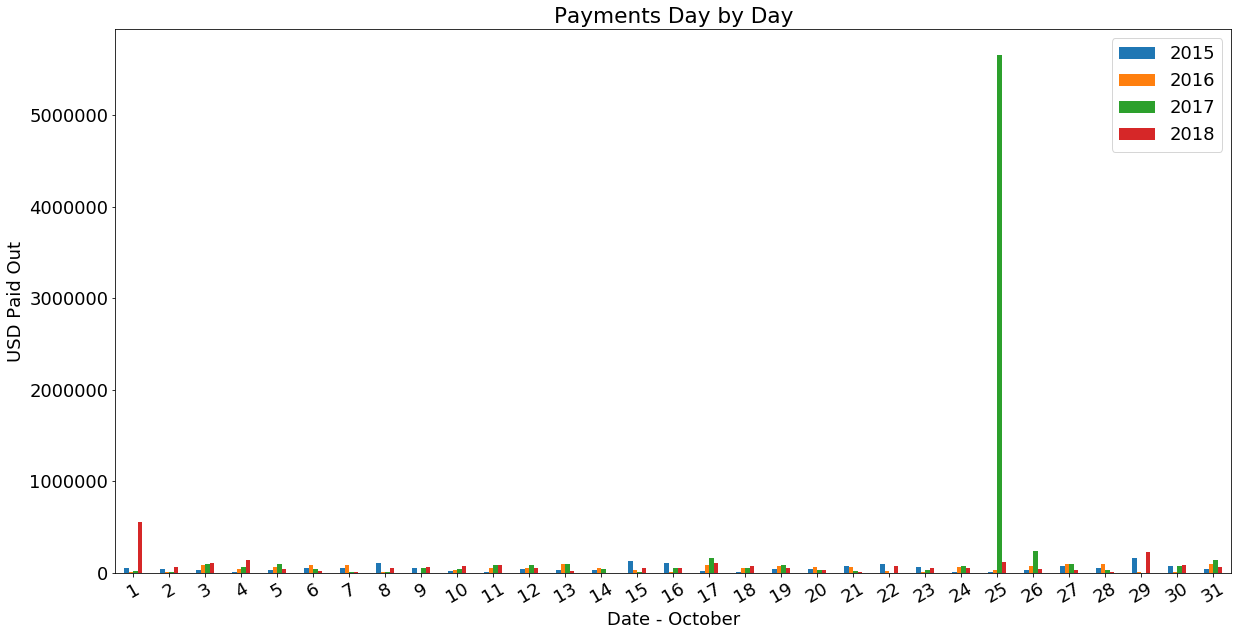

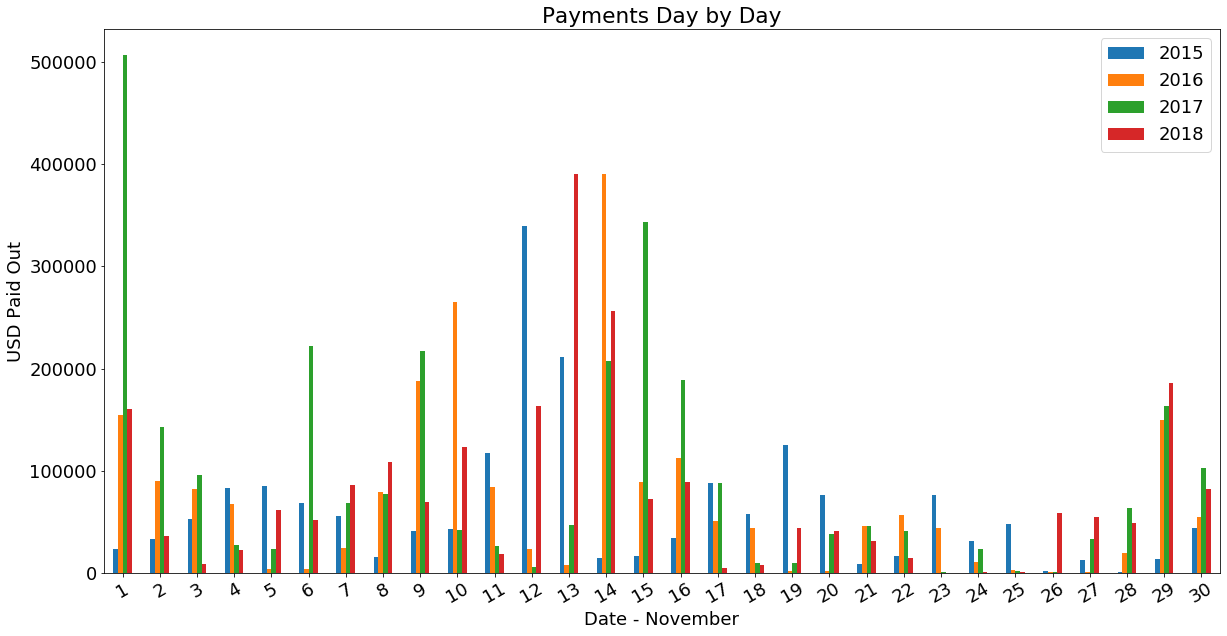

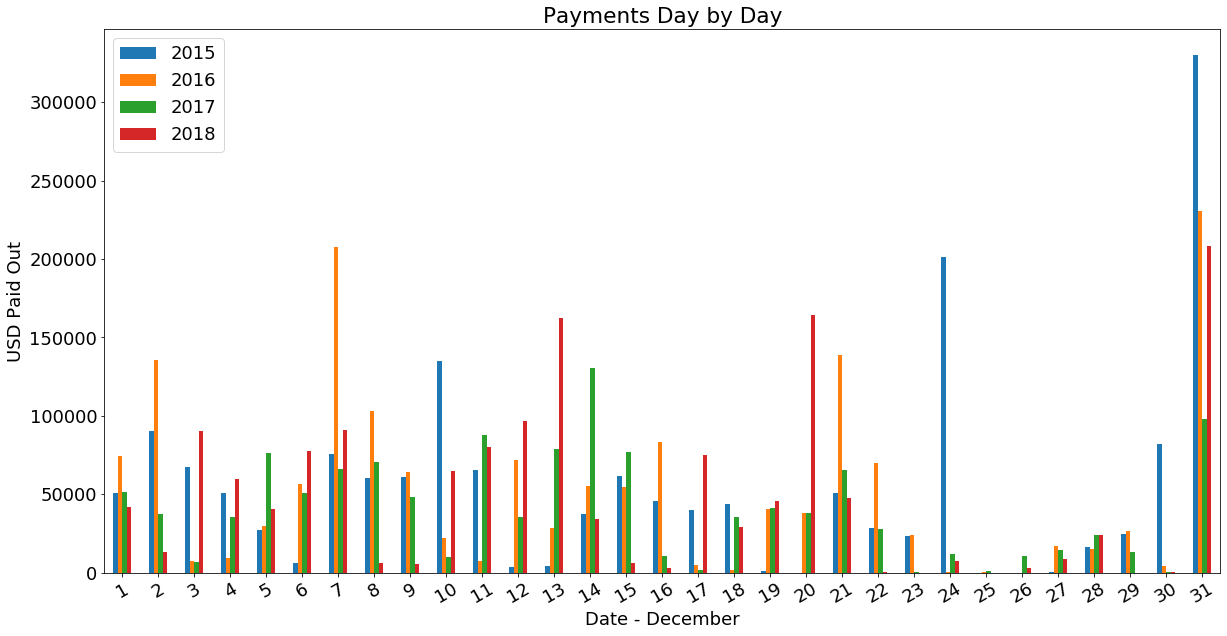

In [15]:
for i in range(1,13):
    df_january_2015 = df[(df['year']==2015) & (df['month']==i)]
    df_january_2016 = df[(df['year']==2016) & (df['month']==i)]
    df_january_2017 = df[(df['year']==2017) & (df['month']==i)]
    df_january_2018 = df[(df['year']==2018) & (df['month']==i)]
    
    df_jan_15 = df_january_2015.groupby('day').sum()['Total_Amount_of_Payment_USDollars']
    df_jan_16 = df_january_2016.groupby('day').sum()['Total_Amount_of_Payment_USDollars']
    df_jan_17 = df_january_2017.groupby('day').sum()['Total_Amount_of_Payment_USDollars']
    df_jan_18 = df_january_2018.groupby('day').sum()['Total_Amount_of_Payment_USDollars']
    
    df_month = DataFrame({
        '2015': df_jan_15,
        '2016': df_jan_16,
        '2017': df_jan_17,
        '2018': df_jan_18 })
    
    fig, ax = plt.subplots(figsize=(20,10))
    df_month.plot.bar(ax=ax, title = 'Payments Day by Day')
    ax.set_ylabel('USD Paid Out')
    ax.set_xlabel('Date - '+calendar.month_name[i])
    plt.xticks(rotation=30)

## 3. What do payments look like throughout the entire year?

In [16]:
df_2015 = df[df['year']==2015]
df_2016 = df[df['year']==2016]
df_2017 = df[df['year']==2017]
df_2018 = df[df['year']==2018]

df_2015 = df_2015.groupby(['Date_of_Payment']).sum()['Total_Amount_of_Payment_USDollars']
df_2016 = df_2016.groupby(['Date_of_Payment']).sum()['Total_Amount_of_Payment_USDollars']
df_2017 = df_2017.groupby(['Date_of_Payment']).sum()['Total_Amount_of_Payment_USDollars']
df_2018 = df_2018.groupby(['Date_of_Payment']).sum()['Total_Amount_of_Payment_USDollars']

# df_annual = DataFrame({
#     '2015': df_2015,
#     '2016': df_2016,
#     '2017': df_2017,
#     '2018': df_2018 })

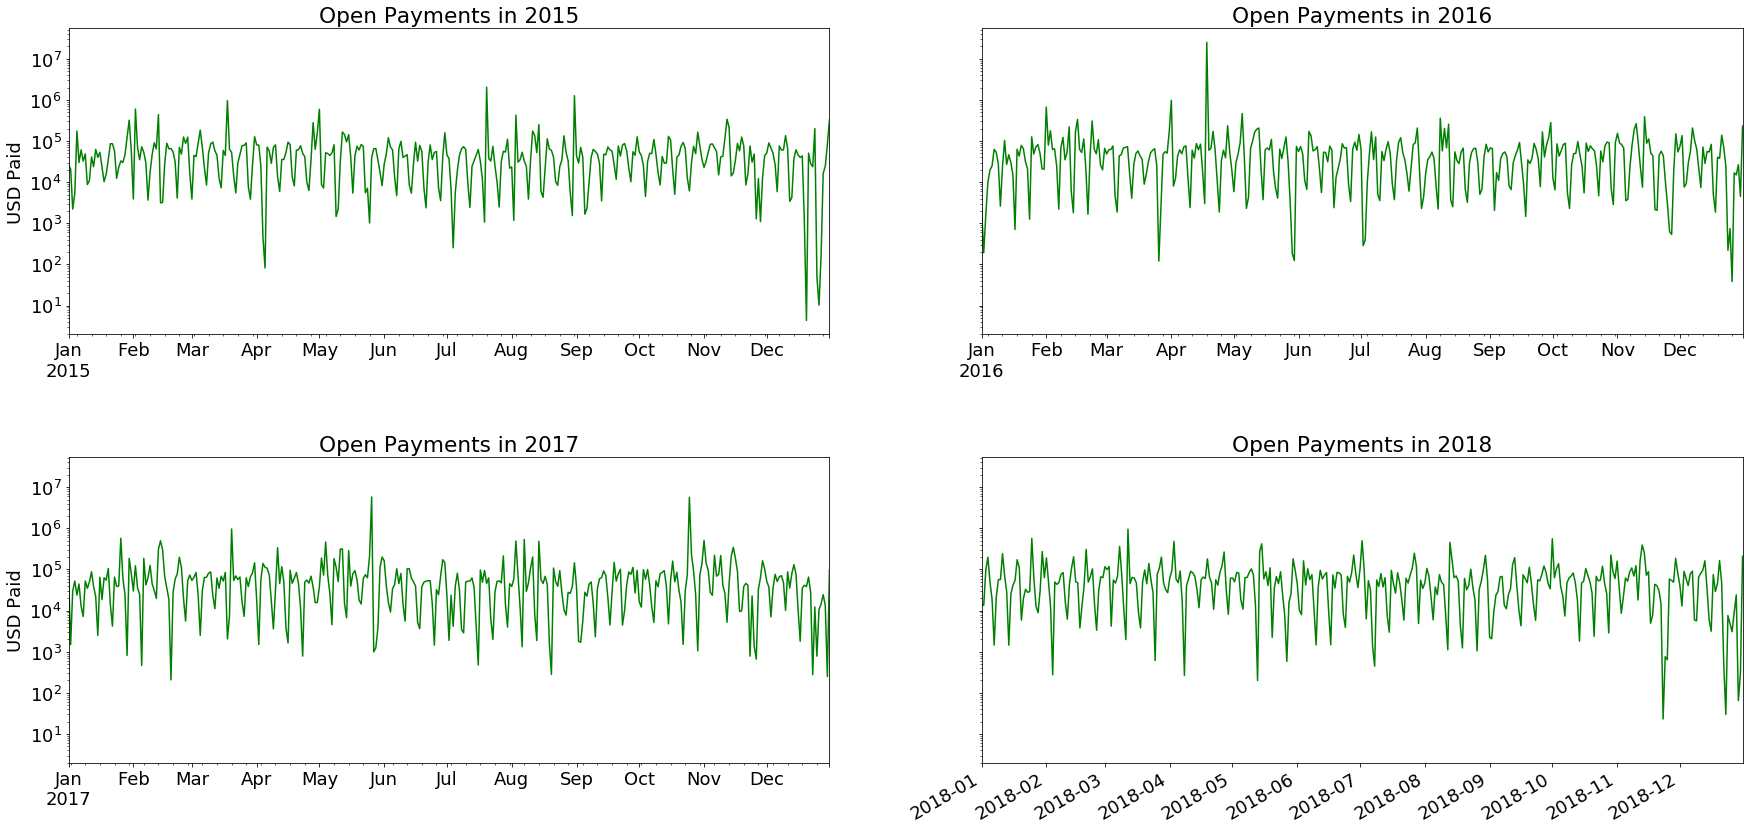

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(30,15), sharey=True)
ax_list = list(ax)
df_2015.plot.line(ax = ax_list[0][0], title = "Open Payments in 2015", color='green', logy=True)
df_2016.plot.line(ax = ax_list[0][1], title = "Open Payments in 2016", color='green')
df_2017.plot.line(ax = ax_list[1][0], title = "Open Payments in 2017", color='green')
df_2018.plot.line(ax = ax_list[1][1], title = "Open Payments in 2018", color='green')
# ax_list[0][0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax_list[1][1].set_xlabel("")
ax_list[1][1].set_ylabel("USD Paid")
ax_list[1][0].set_xlabel("")
ax_list[1][0].set_ylabel("USD Paid")
ax_list[0][1].set_xlabel("")
ax_list[0][1].set_ylabel("USD Paid")
ax_list[0][0].set_xlabel("")
ax_list[0][0].set_ylabel("USD Paid")

# ax.set_ylabel('USD Paid')
# ax.set_xlabel('Date of Payment')
plt.subplots_adjust(wspace=0.2, hspace=0.4)


<h1> 4. Does the number of payments change depending on how far into the year it is? </h1>

<p> Answer: There is a slight decrease: every day, there is a 6% decrease in the number of payments <p>

In [19]:
cash_df_2015 = df[df["year"] == 2015]
lin_reg_df = pd.DataFrame(cash_df_2015["Total_Amount_of_Payment_USDollars"])
lin_reg_df["Days_since_1_1_2015"] = cash_df_2015["Date_of_Payment"].apply(lambda x: (x - pd.Timestamp("2015-01-01 00:00:00")).days)
lin_reg_df = lin_reg_df.sort_values(by=["Days_since_1_1_2015", "Total_Amount_of_Payment_USDollars"])[3:]

In [20]:
date_df = pd.DataFrame(lin_reg_df["Days_since_1_1_2015"].value_counts())
date_df = date_df.sort_index()
date_df["days"] = date_df.index

0.9416494127924624


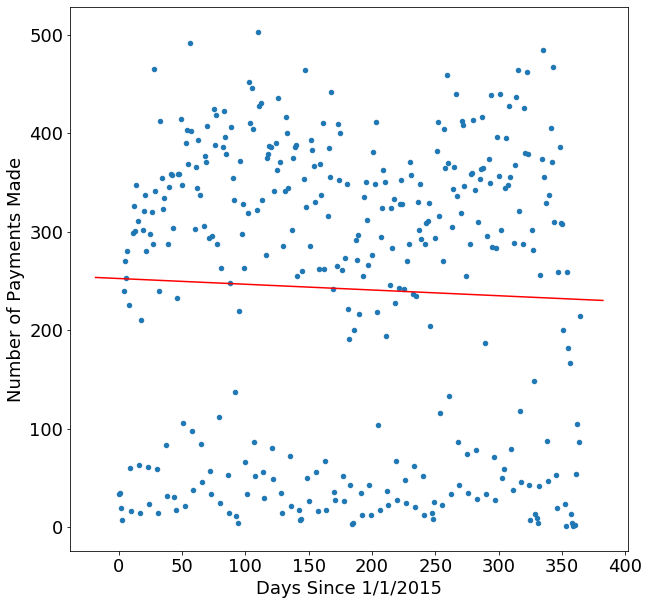

In [21]:
def lin_reg_days_n_cash():
    fig2, ax2018 = plt.subplots(figsize=(10, 10))
    date_df.plot.scatter("days", "Days_since_1_1_2015", ax=ax2018)
    r = LinearRegression()
    r.fit(date_df["days"].values.reshape(-1,1), date_df["Days_since_1_1_2015"].values.reshape(-1,1))
    slope = r.coef_[0][0]
    intercept = r.intercept_[0]
    ax2018.set_xlabel("Days Since 1/1/2015")
    ax2018.set_ylabel("Number of Payments Made")
    y0 = ax2018.get_xlim()[0] * slope + intercept
    y1 = ax2018.get_xlim()[1] * slope + intercept
    ax2018.plot(ax2018.get_xlim(), [y0,y1], color="red")
    print(1 + slope)
lin_reg_days_n_cash()

In [22]:
plt.rcParams['savefig.bbox'] = 'tight'

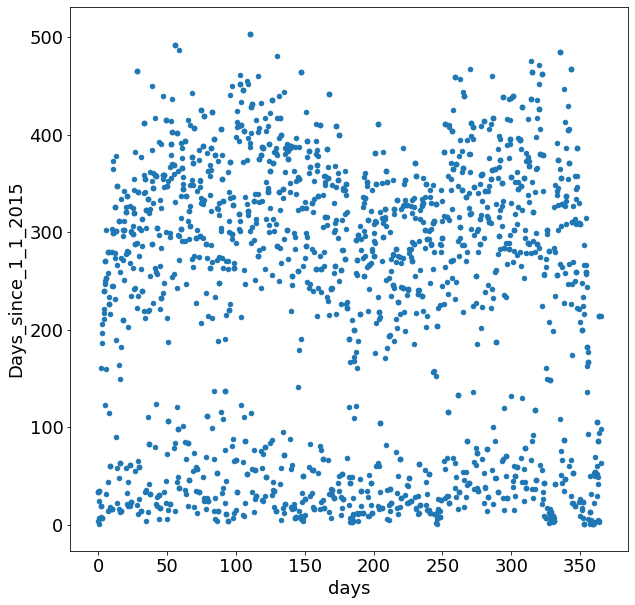

In [33]:
fig4, axyear = plt.subplots(figsize=(10, 10))
def yearly_amounts(year):
    days_365 =  365 * year
    year = 2015 + year
    cash_df = df[df["year"] == year]
    lin_df = pd.DataFrame(cash_df["Total_Amount_of_Payment_USDollars"])
    lin_df["Days_since_1_1_2015"] = cash_df["Date_of_Payment"].apply(lambda x: (x - pd.Timestamp("2015-01-01 00:00:00")).days - days_365)
    lin_df = lin_df.sort_values(by=["Days_since_1_1_2015", "Total_Amount_of_Payment_USDollars"])[3:]
    date_df = pd.DataFrame(lin_df["Days_since_1_1_2015"].value_counts())
    date_df = date_df.sort_index()
    date_df["days"] = date_df.index
    date_df.plot.scatter("days", "Days_since_1_1_2015", ax=axyear)
anim = FuncAnimation(fig4, yearly_amounts, frames=4, interval=500)
html = anim.to_html5_video()
display(HTML(html))

## Average Payment Per Day

In [ ]:
df.groupby(['Date_of_Payment']).sum()['Total_Amount_of_Payment_USDollars'].mean()

In [ ]:
df.groupby(['Date_of_Payment']).sum()['Total_Amount_of_Payment_USDollars'].median()

## Maximum Payments (Payments Aggregated by Day)

In [ ]:
df_daily = df.groupby(['Date_of_Payment']).sum()
df_daily[df_daily['Total_Amount_of_Payment_USDollars']==df_daily['Total_Amount_of_Payment_USDollars'].max()]

## Minimum Payments (Payments Aggregated by Day)

In [ ]:
df_daily[df_daily['Total_Amount_of_Payment_USDollars']==df_daily['Total_Amount_of_Payment_USDollars'].min()]

## 5. Payment Types

In [ ]:
df_2015 = df[df['year']==2015].groupby('Form_of_Payment_or_Transfer_of_Value').sum()['Total_Amount_of_Payment_USDollars']
df_2016 = df[df['year']==2016].groupby('Form_of_Payment_or_Transfer_of_Value').sum()['Total_Amount_of_Payment_USDollars']
df_2017 = df[df['year']==2017].groupby('Form_of_Payment_or_Transfer_of_Value').sum()['Total_Amount_of_Payment_USDollars']
df_2018 = df[df['year']==2018].groupby('Form_of_Payment_or_Transfer_of_Value').sum()['Total_Amount_of_Payment_USDollars']

index = ['Cash', 'Dividends','In-Kind items/services','Stock','Options/Ownership Interest']

df_annual = DataFrame({
    '2015': df_2015,
    '2016': df_2016,
    '2017': df_2017,
    '2018': df_2018 })
# df_annual['index']=index

In [ ]:
ax = df_annual.plot.bar(figsize=(10,10))
ax.set_title('Payment Types')
ax.set_ylabel("USD Paid")
ax.set_xticklabels(index,rotation=50)
# plt.xticks([0, 1, 2, 3, 4],index)
plt.ticklabel_format(style='plain', axis='y')

## 6. How is the Money being used? - Wat is dis?

In [ ]:
df_2015 = df[df['year']==2015].groupby('Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1').sum()['Total_Amount_of_Payment_USDollars']
df_2016 = df[df['year']==2016].groupby('Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1').sum()['Total_Amount_of_Payment_USDollars']
df_2017 = df[df['year']==2017].groupby('Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1').sum()['Total_Amount_of_Payment_USDollars']
df_2018 = df[df['year']==2018].groupby('Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1').sum()['Total_Amount_of_Payment_USDollars']

df_spent = DataFrame({
    '2015': df_2015,
    '2016': df_2016,
    '2017': df_2017,
    '2018': df_2018 })

In [ ]:
ax = df_spent.plot.bar(figsize=(10,6))
ax.set_xticklabels(['NO VALUE','Biological','Device','Drug','Medical Supply'],rotation=50)
ax.set_ylabel('USD Paid')
ax.set_xlabel('')

In [ ]:
# df_new = df_spent.plot.bar(x='Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1', y='Total_Amount_of_Payment_USDollars')
# df_new = df_spent.sort_values(by='Total_Amount_of_Payment_USDollars', ascending=False).head(20)
# df_new.groupby('Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1').sum()
df_new = df_spent.groupby('Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1').sum().head(30)
ax_1 = df_new.plot.bar(y='Total_Amount_of_Payment_USDollars',figsize=(20,10), legend = False,logy=True, color= 'green')
# plt.xticks(rotation=60)
ax_1.set_xlabel("")
ax_1.set_title("Name of Drug, Biological, Device, or Medical Supply")
ax_1.set_ylabel("USD Paid")
# ax_1.text(0, 1, 'NO VALUE',transform=ax.transAxes)

### So even though in total, devices is the category with highest paid amount. However, when looking at individual payments, "no value" dominates 

In [ ]:
df_nature = df_spent.groupby('Nature_of_Payment_or_Transfer_of_Value').sum()
ax_2 = df_nature.plot.bar(y='Total_Amount_of_Payment_USDollars',figsize=(20,10), legend = False,logy=True, color= 'green')
ax_2.set_title("Nature of Payment or Transfer of Value")
ax_2.set_ylabel("USD Paid")
ax_2.set_xlabel("")

## 7. Number of Payments In Total Amount

In [ ]:
df_2015 = df[df['year']==2015].groupby('Number_of_Payments_Included_in_Total_Amount').sum()['Total_Amount_of_Payment_USDollars']
df_2016 = df[df['year']==2016].groupby('Number_of_Payments_Included_in_Total_Amount').sum()['Total_Amount_of_Payment_USDollars']
df_2017 = df[df['year']==2017].groupby('Number_of_Payments_Included_in_Total_Amount').sum()['Total_Amount_of_Payment_USDollars']
df_2018 = df[df['year']==2018].groupby('Number_of_Payments_Included_in_Total_Amount').sum()['Total_Amount_of_Payment_USDollars']

df_num = DataFrame({
    '2015': df_2015,
    '2016': df_2016,
    '2017': df_2017,
    '2018': df_2018 })

df_num.plot.line()
# ax_3 = df.plot.scatter(x='Number_of_Payments_Included_in_Total_Amount',y='Total_Amount_of_Payment_USDollars', figsize=(20,10))
# ax_3.set_xlabel('Number of Payments Included in Total Amount')
# ax_3.set_ylabel('USD Paid')
# ax_3.set_title('Frequence of Payments Per Total Amount')

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.hist(df['Number_of_Payments_Included_in_Total_Amount'], bins = 10)
plt.yscale('log')

## Recipients (Is this right?)

In [ ]:
# df_rec = df.groupby('Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name').sum()
df_rec = df[['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name','Total_Amount_of_Payment_USDollars']]
df_rec.sort_values(by='Total_Amount_of_Payment_USDollars', ascending=False)

#the top 5
df2 = df_rec.sort_values(by='Total_Amount_of_Payment_USDollars', ascending=False)[:100].copy()

#others
new_row = pd.DataFrame(data = {
    'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name' : ['others'],
    'Total_Amount_of_Payment_USDollars' : [df['Total_Amount_of_Payment_USDollars'][100:].sum()]
})

#combining top 5 with others
df2 = pd.concat([df2, new_row])
df2.groupby('Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name').sum().sort_values(by='Total_Amount_of_Payment_USDollars', ascending=False)

In [ ]:
# ax = df.groupby('Covered_Recipient_Type').sum().plot.pie(y='Total_Amount_of_Payment_USDollars', legend = False)
# ax.set_ylabel("")

df_2015 = df[df['year']==2015].groupby('Covered_Recipient_Type').sum()['Total_Amount_of_Payment_USDollars']
df_2016 = df[df['year']==2016].groupby('Covered_Recipient_Type').sum()['Total_Amount_of_Payment_USDollars']
df_2017 = df[df['year']==2017].groupby('Covered_Recipient_Type').sum()['Total_Amount_of_Payment_USDollars']
df_2018 = df[df['year']==2018].groupby('Covered_Recipient_Type').sum()['Total_Amount_of_Payment_USDollars']

df_type = DataFrame({
    '2015': df_2015,
    '2016': df_2016,
    '2017': df_2017,
    '2018': df_2018 })

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(30,15))
ax_list = list(ax)
df_2015.plot.pie(ax = ax_list[0][0], title = "Recipient Type in 2015")
df_2016.plot.pie(ax = ax_list[0][1], title = "Recipient Type in 2016")
df_2017.plot.pie(ax = ax_list[1][0], title = "Recipient Type in 2017")
df_2018.plot.pie(ax = ax_list[1][1], title = "Recipient Type in 2018")
# ax_list[0][0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax_list[1][1].set_xlabel("")
ax_list[1][1].set_ylabel("")
ax_list[1][0].set_xlabel("")
ax_list[1][0].set_ylabel("")
ax_list[0][1].set_xlabel("")
ax_list[0][1].set_ylabel("")
ax_list[0][0].set_xlabel("")
ax_list[0][0].set_ylabel("")

<h1> 8. Where are the doctors who receive benefits located?</h1>

In [ ]:
zip_df = df["Recipient_Zip_Code"].apply(lambda x: x[:5])

In [ ]:
nomi = pgeocode.Nominatim('US')

In [ ]:
lat_long_df = pd.DataFrame(nomi.query_postal_code(list(zip_df)).latitude)
lat_long_df["longitude"] = nomi.query_postal_code(list(zip_df)).longitude
lat_long_df = lat_long_df[(lat_long_df["longitude"] > -95) & (lat_long_df["latitude"] > 36) & (lat_long_df["longitude"] < -80)]

In [ ]:
usa = gpd.read_file(os.path.join(".","map","states_21basic", "states.shp"))

In [ ]:
fig, ax = plt.subplots()

In [ ]:
midwest= usa[usa.SUB_REGION == "East North Central"]
ax = midwest.plot(figsize=(15,10))

In [ ]:
gdf = geopandas.GeoDataFrame(
    lat_long_df, geometry=geopandas.points_from_xy(lat_long_df.longitude, lat_long_df.latitude))

In [ ]:
gdf.plot(color="red", marker="o", ax=ax, markersize=.5).figure

In [ ]:
zip_df15 = df_2015["Recipient_Zip_Code"].apply(lambda x: x[:5])
zip_df16 = df_2016["Recipient_Zip_Code"].apply(lambda x: x[:5])
zip_df17 = df_2017["Recipient_Zip_Code"].apply(lambda x: x[:5])
zip_df18 = df_2018["Recipient_Zip_Code"].apply(lambda x: x[:5])
ll_15 = pd.DataFrame(nomi.query_postal_code(list(zip_df15)).latitude)
ll_15["longitude"] = nomi.query_postal_code(list(zip_df15)).longitude
ll_15 = ll_15[(ll_15["longitude"] > -95) & (ll_15["latitude"] > 36) & (ll_15["longitude"] < -80)]
ll_16 = pd.DataFrame(nomi.query_postal_code(list(zip_df16)).latitude)
ll_16["longitude"] = nomi.query_postal_code(list(zip_df16)).longitude
ll_16 = ll_16[(ll_16["longitude"] > -95) & (ll_16["latitude"] > 36) & (ll_16["longitude"] < -80)]
ll_17 = pd.DataFrame(nomi.query_postal_code(list(zip_df17)).latitude)
ll_17["longitude"] = nomi.query_postal_code(list(zip_df17)).longitude
ll_17 = ll_17[(ll_17["longitude"] > -95) & (ll_17["latitude"] > 36) & (ll_17["longitude"] < -80)]
ll_18 = pd.DataFrame(nomi.query_postal_code(list(zip_df18)).latitude)
ll_18["longitude"] = nomi.query_postal_code(list(zip_df18)).longitude
ll_18 = ll_18[(ll_18["longitude"] > -95) & (ll_18["latitude"] > 36) & (ll_18["longitude"] < -80)]
    

In [ ]:
def change_in_zips(year):
    year = 15 + year
    if year == 15:
        ll = ll_15
    if year == 16:
        ll = ll_16
    if year == 17:
        ll = ll_17
    if year == 18:
        ll = ll_18
    zdf = geopandas.GeoDataFrame(
        ll, geometry=geopandas.points_from_xy(ll.longitude, ll.latitude))
    return zdf.plot(color="red", marker="o", ax=ax, markersize=.5).figure
change_in_zips(1)

In [ ]:
anim = FuncAnimation(fig, change_in_zips, frames=4, interval=.5)
html = anim.to_html5_video()
display(HTML(html))